In [9]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import math

In [10]:
# Import file
df= pd.read_csv(r"C:\Users\elemo\Downloads\Data\Python\Capstone Proj\Customer-Churn.csv")

In [11]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
# Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df["TotalCharges"]= pd.to_numeric(df["TotalCharges"], errors= "coerce")

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

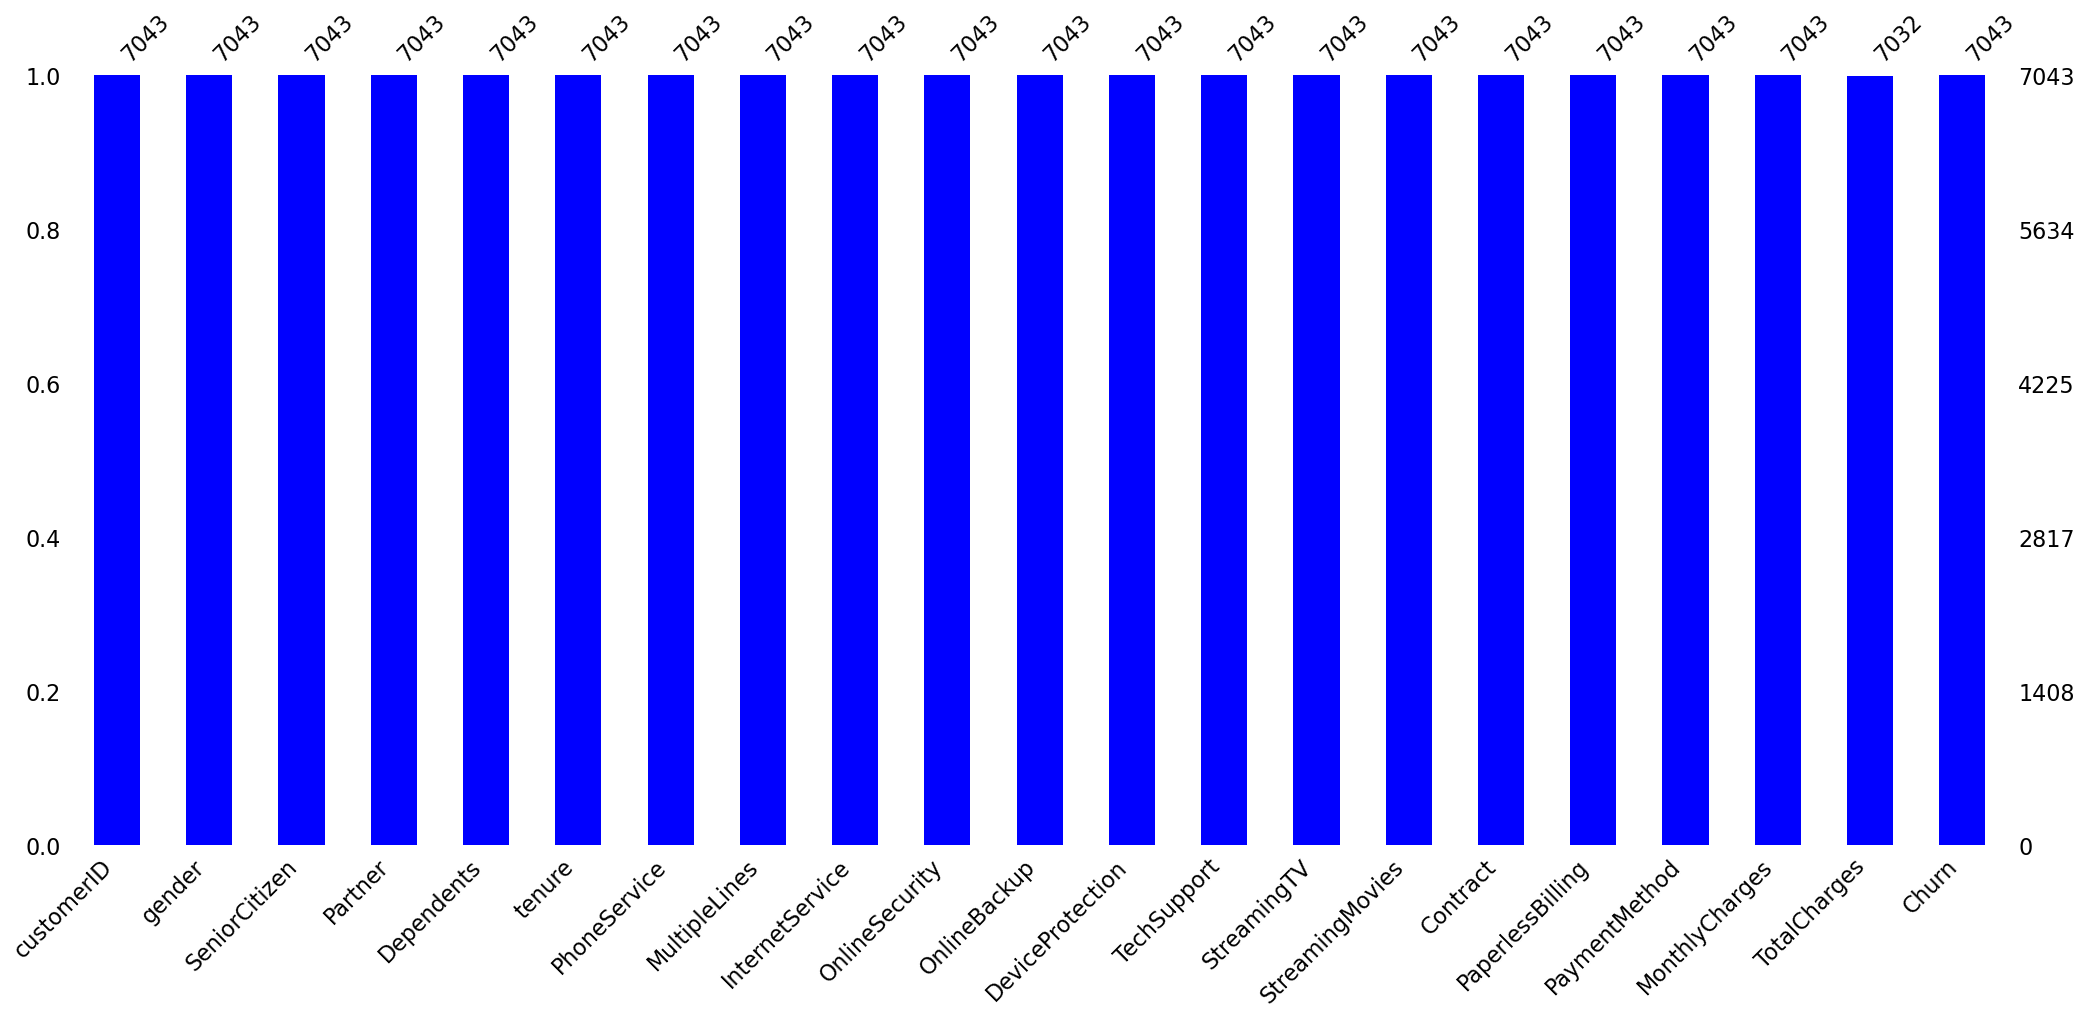

In [21]:
msno.bar(df, color="blue")

In [23]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

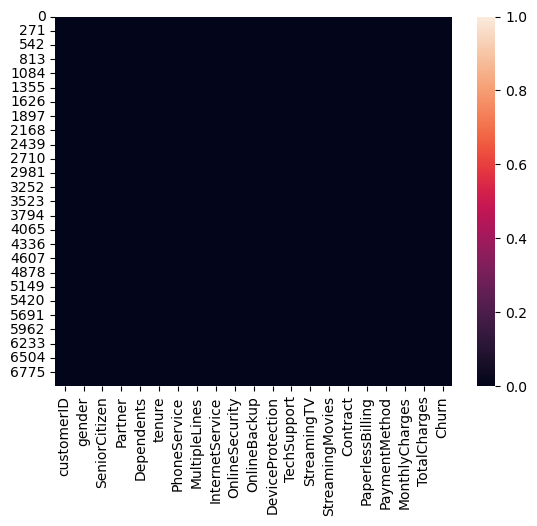

In [25]:
sns.heatmap(df.isna())

In [27]:
# Take care of isna 
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [29]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df.duplicated().sum()

0

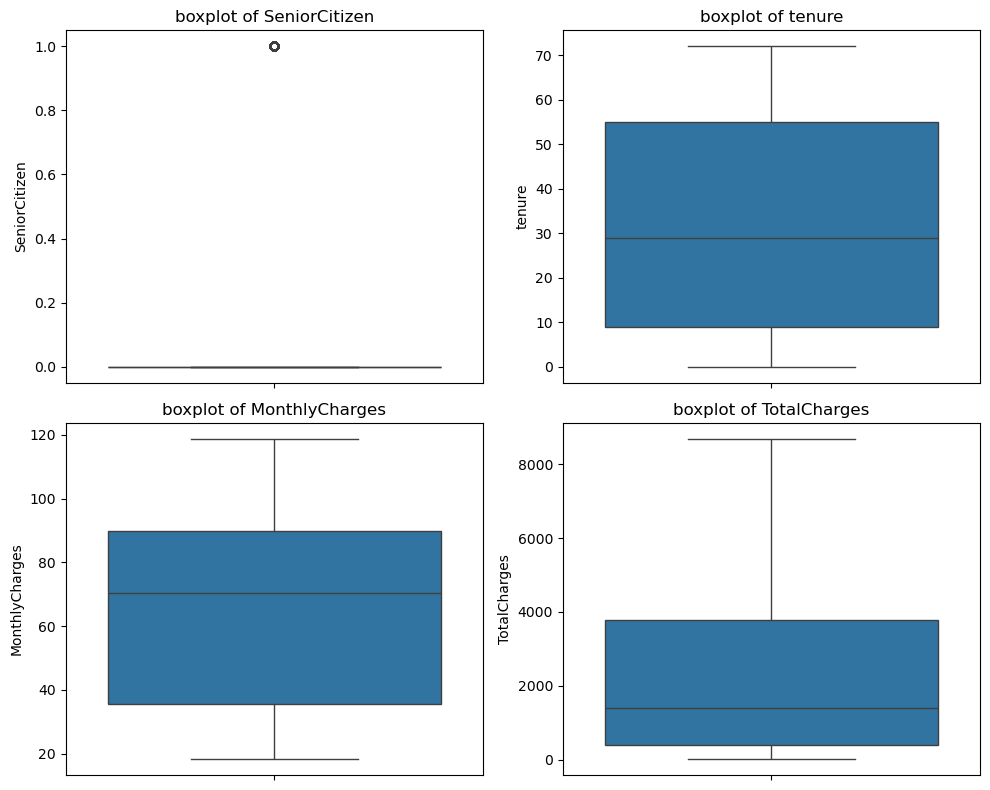

In [31]:
# Univariates Analysis
# Numerical data
numerical_features= df.select_dtypes(exclude="object")
plt.figure(figsize=(10,8))
for idx,columns in enumerate(numerical_features, 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(data=numerical_features, y=columns)
    plt.title(f"boxplot of {columns}")

plt.tight_layout()
plt.show()


### Narration
There are no extreme value or outliers from the numerical values.
1. Tenure: data in tenure appears to be a normal distribution,because the median,50% percentile appears to centred
2. Monthly Charges: This appears to be negatively skewed because the median and whisker is at the top
3. Total Charges: data here is positively skewed,the 50% interquartile range is at the bottom

In [33]:
df.drop(["customerID"], axis=1, inplace=True)

In [35]:
categorical_features= df.select_dtypes(include="object")
categorical_features


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [39]:
categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

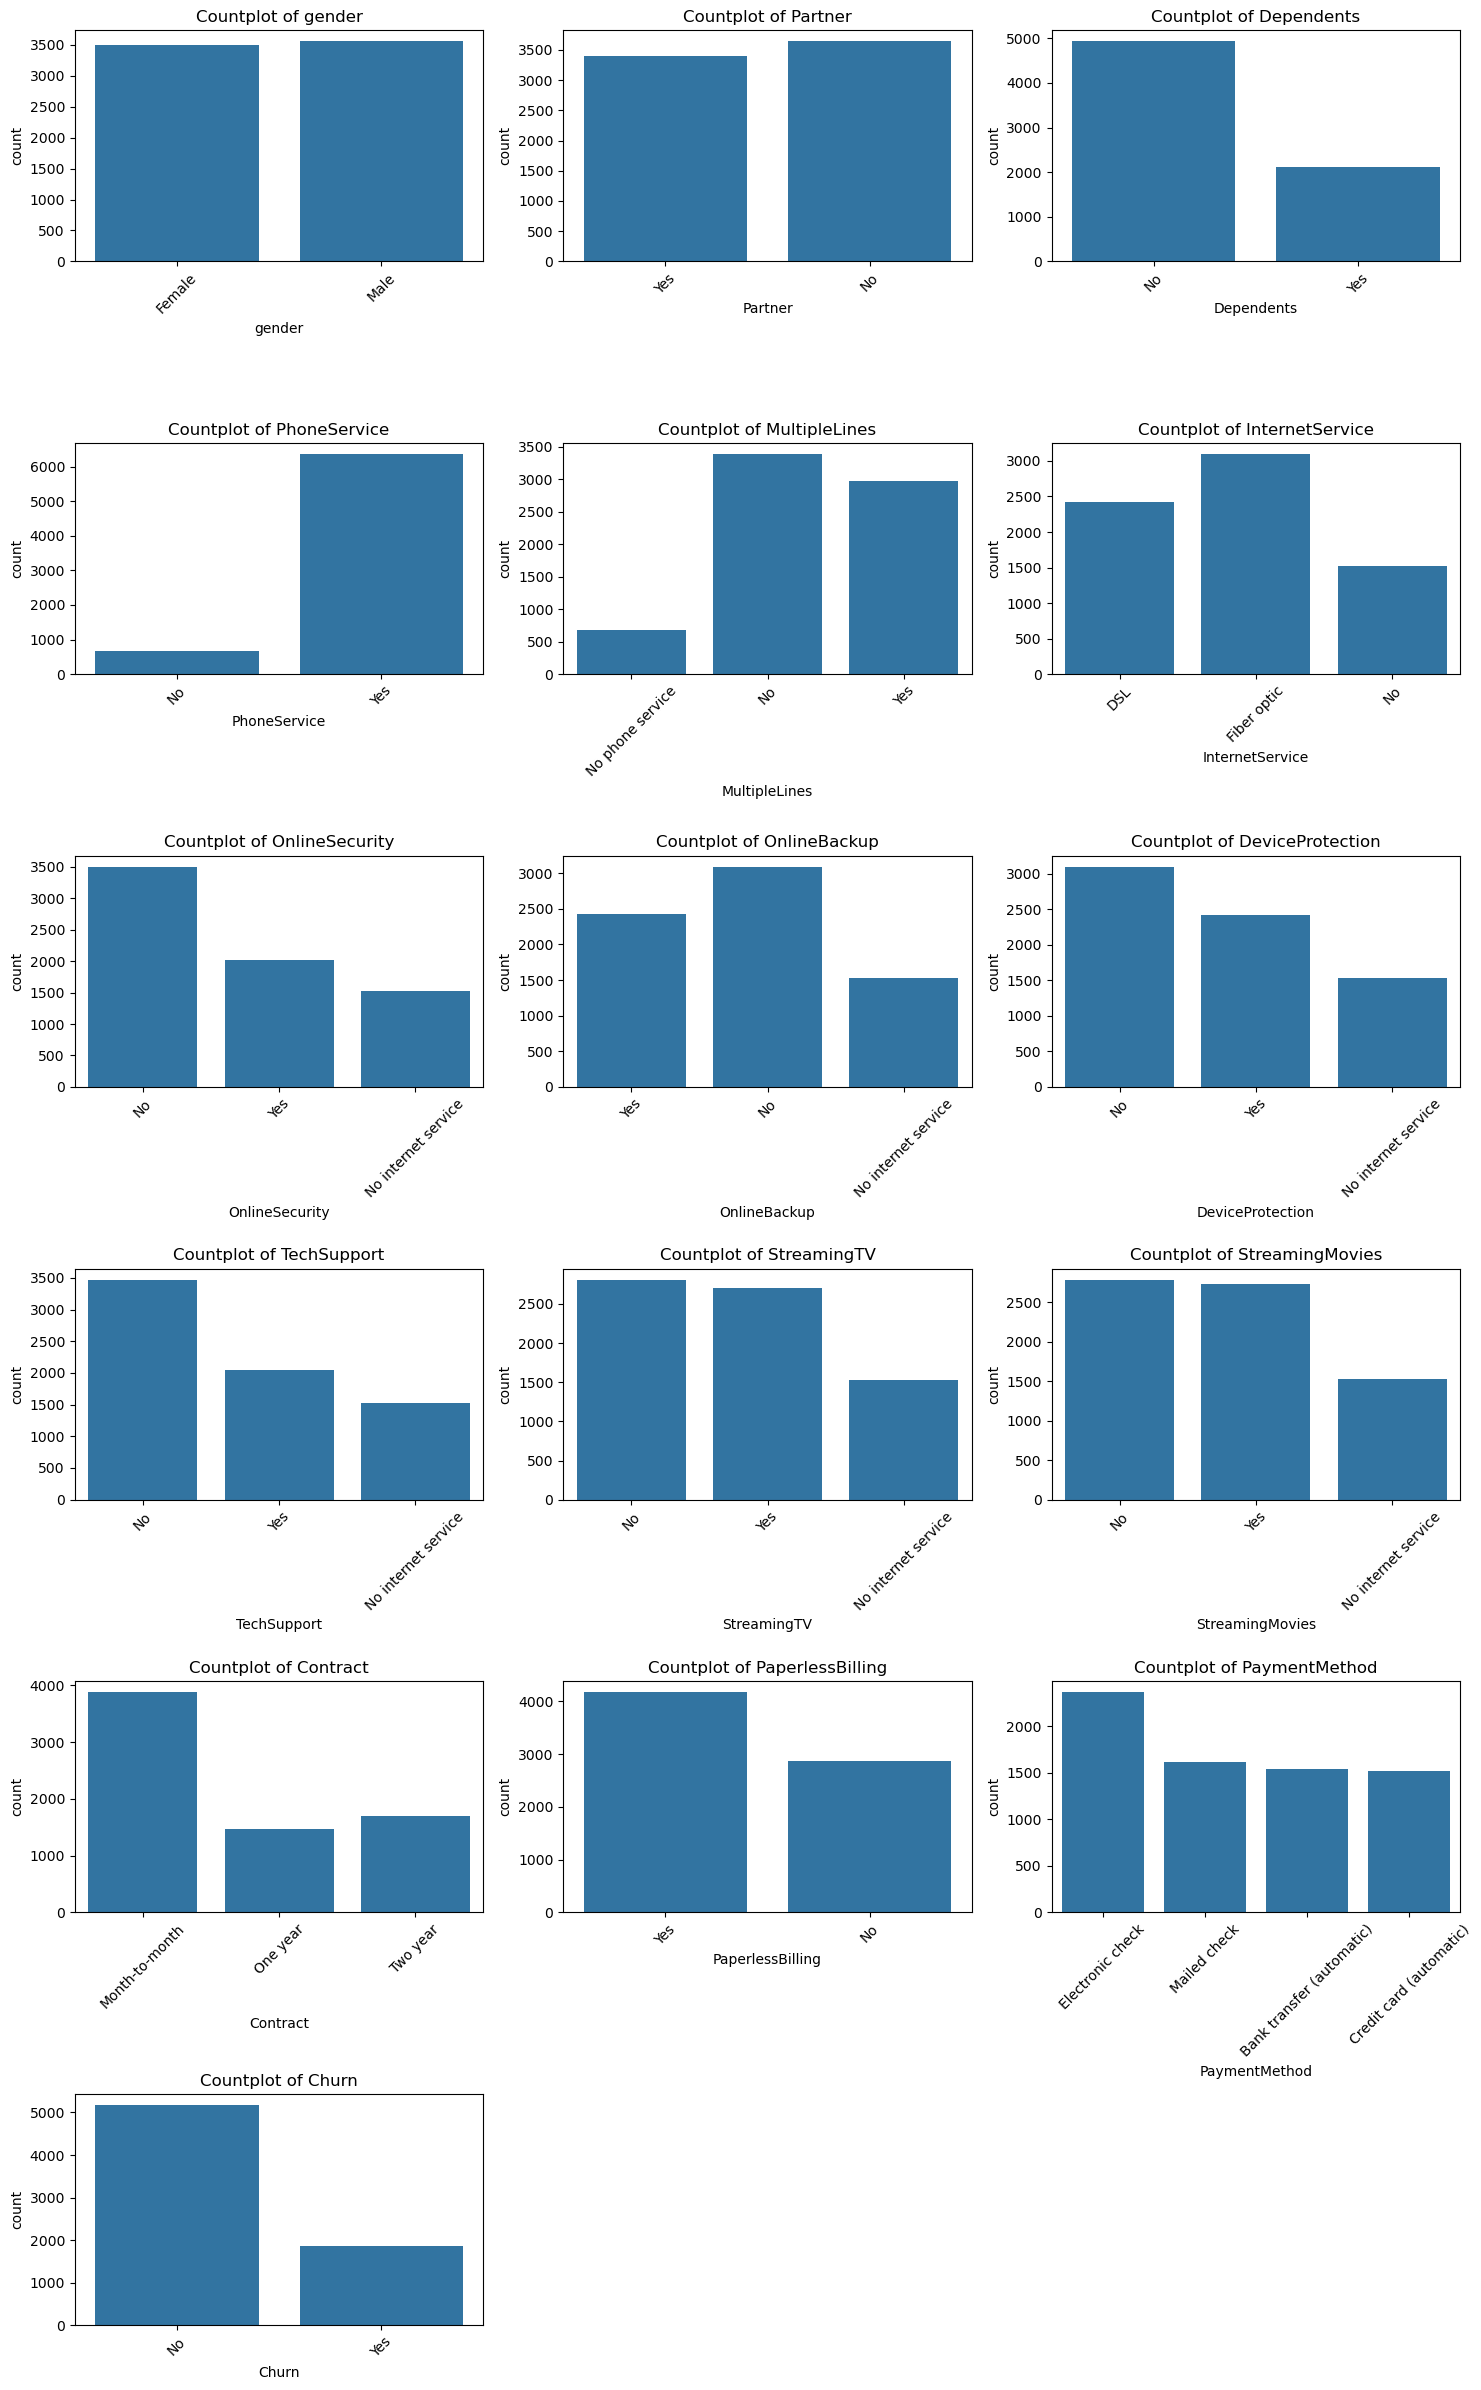

In [40]:
# Univariate analysis of Categorical data
categorical_features= df.select_dtypes(include="object")
num_columns = len(categorical_features.columns)
rows = math.ceil(num_columns / 3)  
plt.figure(figsize=(15, rows* 4))
for i,column in enumerate(categorical_features.columns,1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45) 
    plt.title(f"Countplot of {column}")



plt.tight_layout()
plt.show()



### Narration
The Exploration of the features of the data sets shows the following
1. Gender: The count of gender shows a slightly higher male population
2. Partner: Data shows more customers do not have partner,further analysis might show if this has any effect on churn
3. Dependent: Many of the customers do not have dependent
4. PhoneService: Most customers have phone services
5. MultipleLines: This is the lowest,which shows that there are more customers with no multiple lines
6. InternetService: Most internet services is with the use of fibre optic compared to DSL,more information can be obtained to determine if internet service provided using any  of the medium is better than others
7. OnlineSecurity: Larger number of customers do not opt for online security
8. OnlineBackup: The larger number of customers do not subscribe to online backup
9. DeviceProtection: There are also more customers with no device protection
10. TechSupport: Most do not have this
11. StreamingTV: There is a higher number of Customers that do not have StreamingTV,although many also have this service because, there appears to be very minimal difference in the number that have StreamingTV
12. StreamingMovies: Appears to be almost the same as the StreamingTV
13. Contract: Most of the contract is on a month to month basis rather than a long term plan like a one year and two year period
14. PaperlessBilling: Many customers are on the PaperlessBilling
15. PaymentMethod : Customers pay more using electronic checks


In [42]:
numerical_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [43]:
categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

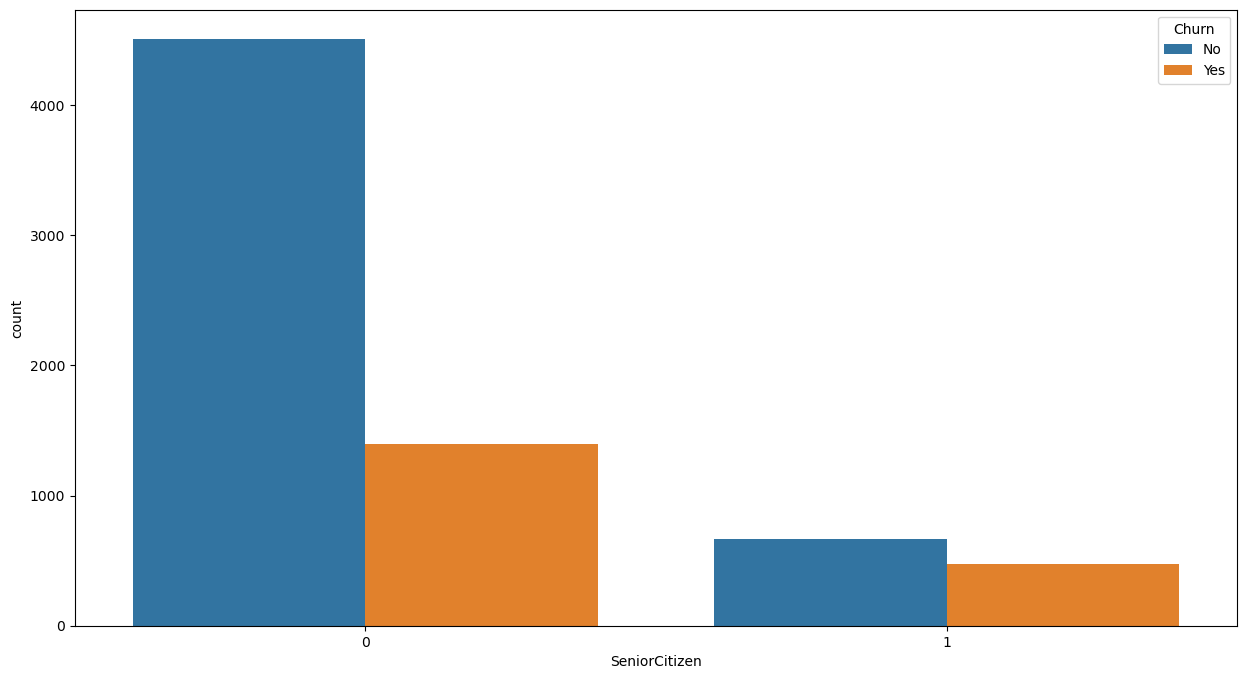

In [44]:
# Bivariate Analysis
plt.figure(figsize=(15,8))
sns.countplot(data=df, hue="Churn", x="SeniorCitizen");

### Narration 
 The review of the churn pattern shows that the churn rate is the highest among the customers that are not Senior citizen.It will be insightful to understand their preferrence with more information

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


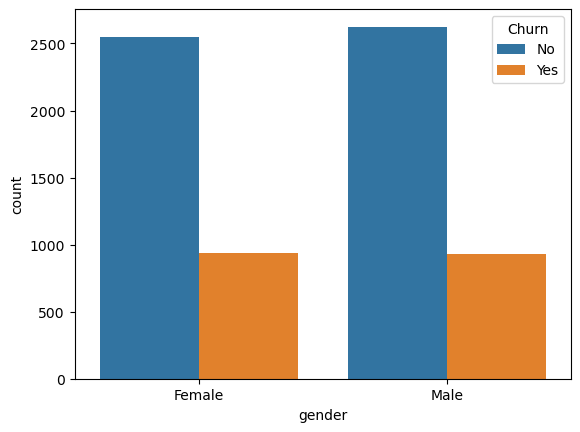

In [46]:
# Churn rate based on gender
sns.countplot(data=categorical_features, x="gender", hue="Churn")

df.groupby(["gender", "Churn"]).size().unstack()

### Narration
The analysis of gender distribution among customers revealed a slightly higher proportion of male customers compared to female. However, when comparing churn behavior across genders, no significant difference was observed,both male and female customers exhibited similar churn rates, indicating that gender alone is not a strong predictor of customer churn. This suggests that customer retention strategies should focus more on behavioral patterns, service usage, and demographic factors rather than gender-specific initiatives.


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


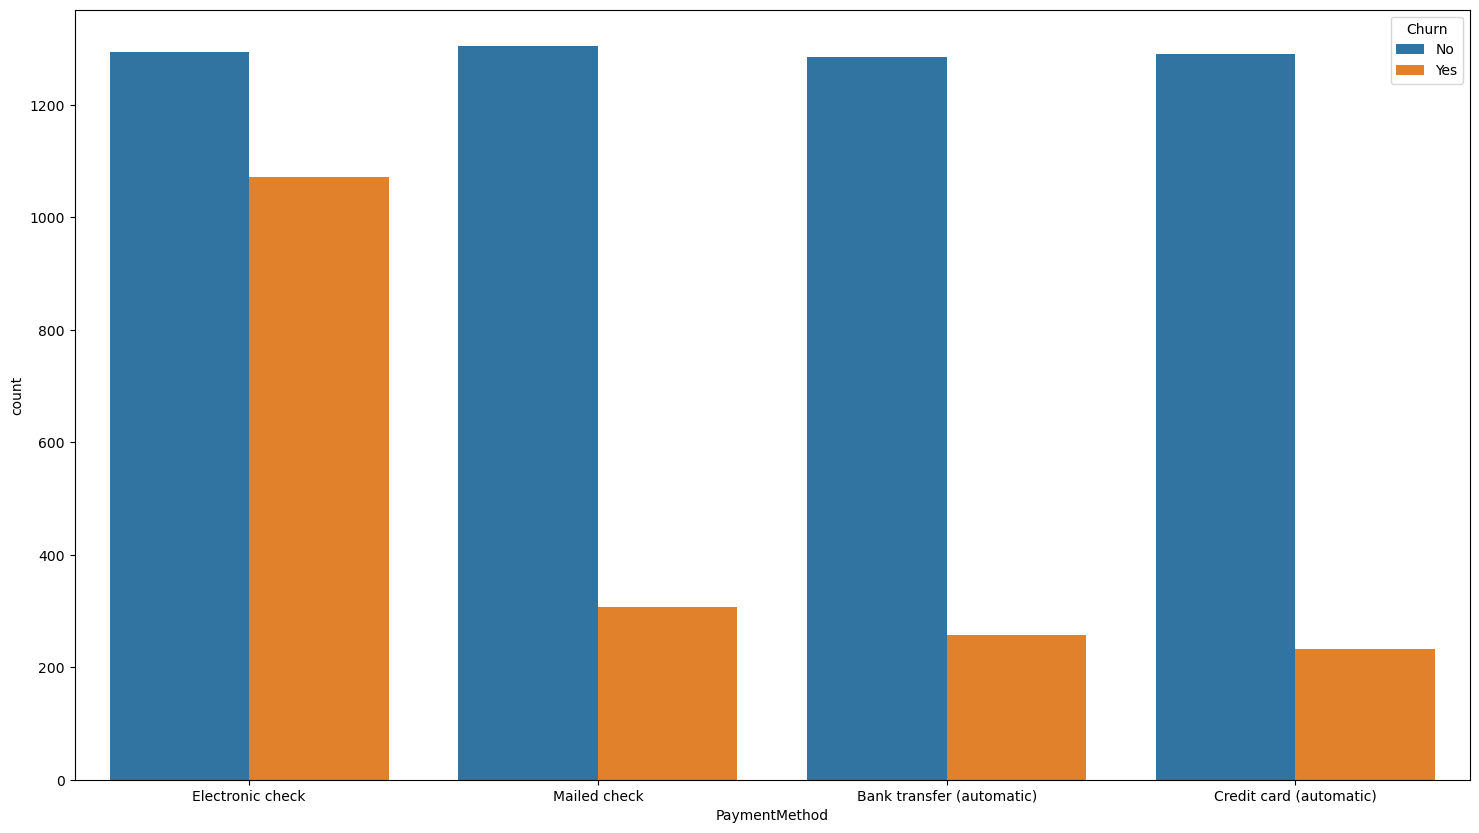

In [48]:
# Churn rate based on Payment method
plt.figure(figsize=(18,10))
sns.countplot(data=categorical_features, x="PaymentMethod", hue="Churn")

df.groupby(["PaymentMethod", "Churn"]).size().unstack()

### Narration
The churn rate among customers using electronic check is the highest while the customers using credit card appears to be the lowest,
this could be because of the availability of credit which can be accessed by customers using credit card, Offering incentives for switching to automated payment methods or enhancing the billing experience for this group could help reduce churn.       

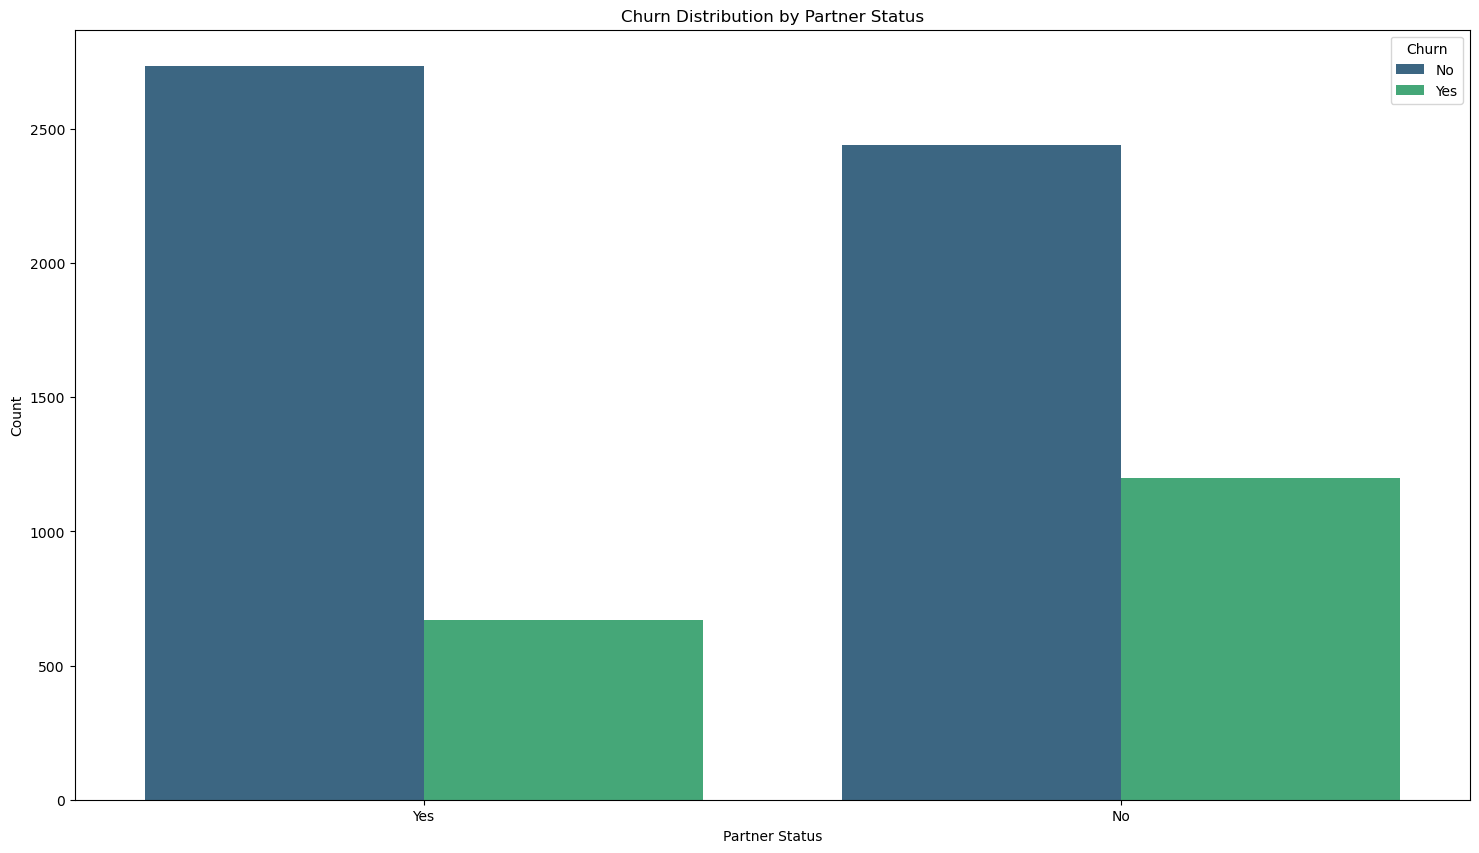

In [50]:
# Partner Vs Churn
plt.figure(figsize=(18, 10))
sns.countplot(x='Partner', hue='Churn', data=df, palette='viridis')
plt.title('Churn Distribution by Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.show()


### Narration
Customers with no partner show a higher churn rate compared to those with a partner,on the other hand customers with a partner showed greater stability, indicating a lower likelihood of churn.
This pattern suggests that customers with partners may have stronger ties to their service commitments, potentially due to shared financial responsibilities or household stability.
The higher churn rate among individuals without partners highlights an opportunity for targeted engagement strategies. Offering personalized loyalty incentives, flexible service bundles, or additional support for single customers may improve retention in this segment.


In [52]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

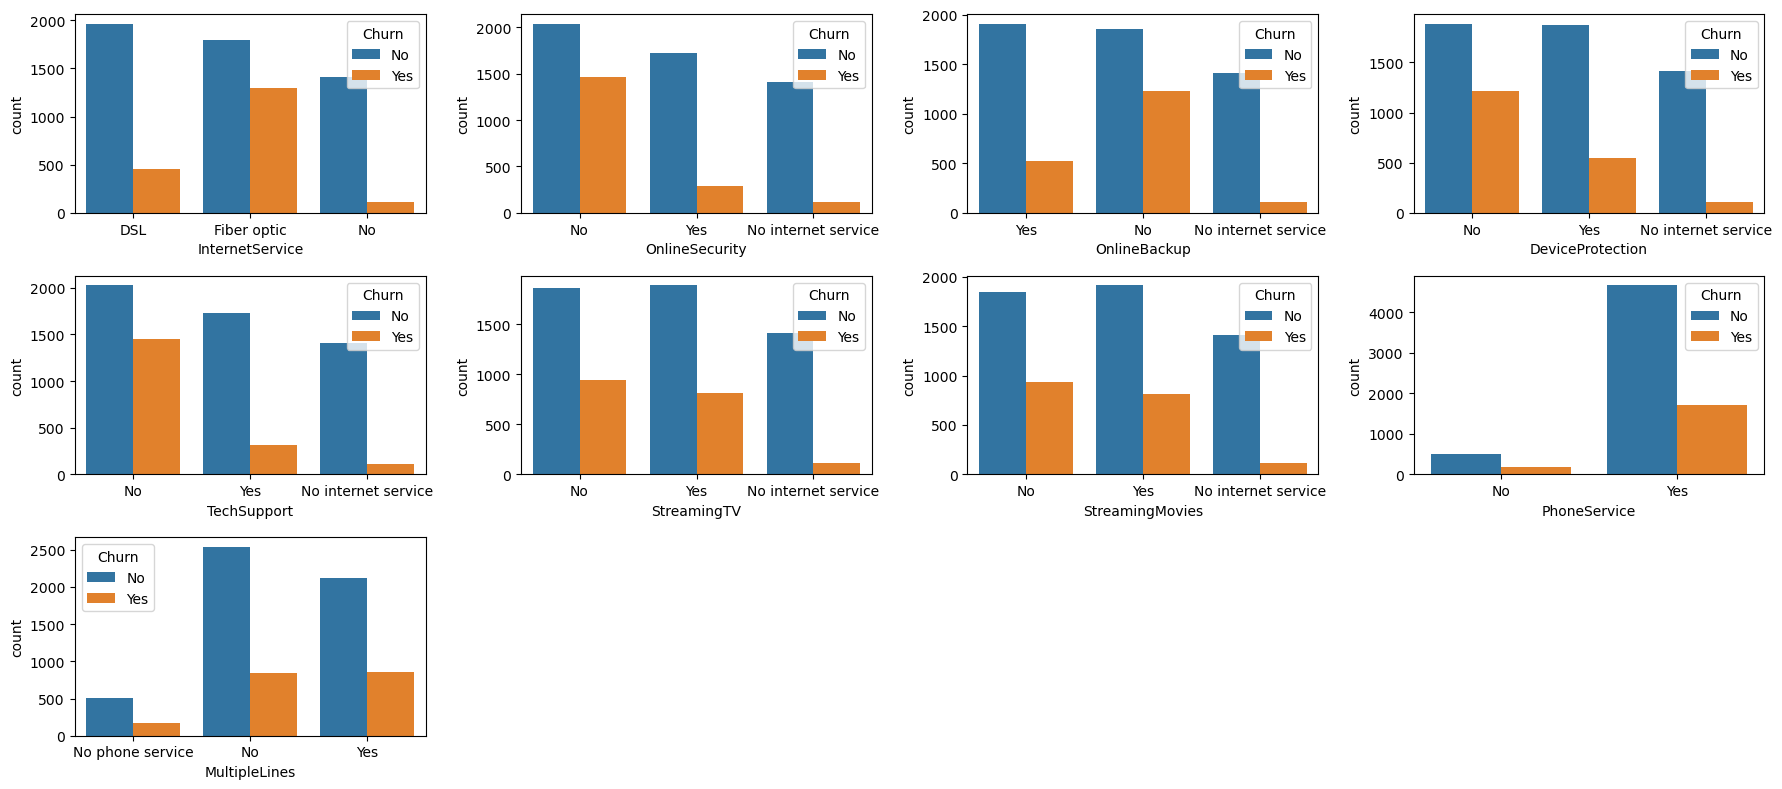

In [53]:
# Churn Vs Service related Features
service_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', "PhoneService", "MultipleLines"]
plt.figure(figsize=(18,8))
for i, feature in enumerate (service_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=feature, hue='Churn')
    

plt.tight_layout()
plt.show()


### Narration
1. Internet Service
Customers with Fiber Optic connections experienced the highest churn rate.In contrast, customers with DSL and those with No Internet Service exhibited lower churn rates.
This higher churn among Fiber Optic users may indicate dissatisfaction with
 service reliability, or customer support. Offering enhanced value, such as improved customer service or loyalty incentives, could help reduce churn in this group.

2. Online Security, Online Backup and Device Protection
Customers who did not subscribe to these services showed higher churn rates.
Customers with active Online Security, Online Backup or Device protection subscriptions displayed improved retention.
These security-related services may contribute to customer satisfaction and loyalty. Promoting these add-ons during the onboarding process could improve retention

3. Tech Support
Customers without Tech Support experienced significantly higher churn rates compared to those with this service.
Tech support appears to play a crucial role in customer retention. Encouraging customers to add this service — particularly new customers — could reduce churn risk.

4. Streaming Services (Streaming TV & Streaming Movies)
While these features had moderate churn rates, customers with both streaming services active appeared more engaged and had slightly better retention.
Bundling streaming services with other core offerings may enhance customer loyalty.

5. Phone Service & Multiple Lines
Customers with Phone Service Only had lower churn rates than those with Multiple Lines.
This suggests that while phone service itself is stable, multiple-line customers may face higher costs or more complex needs, increasing churn risk.
Identifying and creating a bundle plan for multiple-line users that allows them pay a reasonably less amount might be an incentive and help reduce churn through .



### Multivariate Analysis

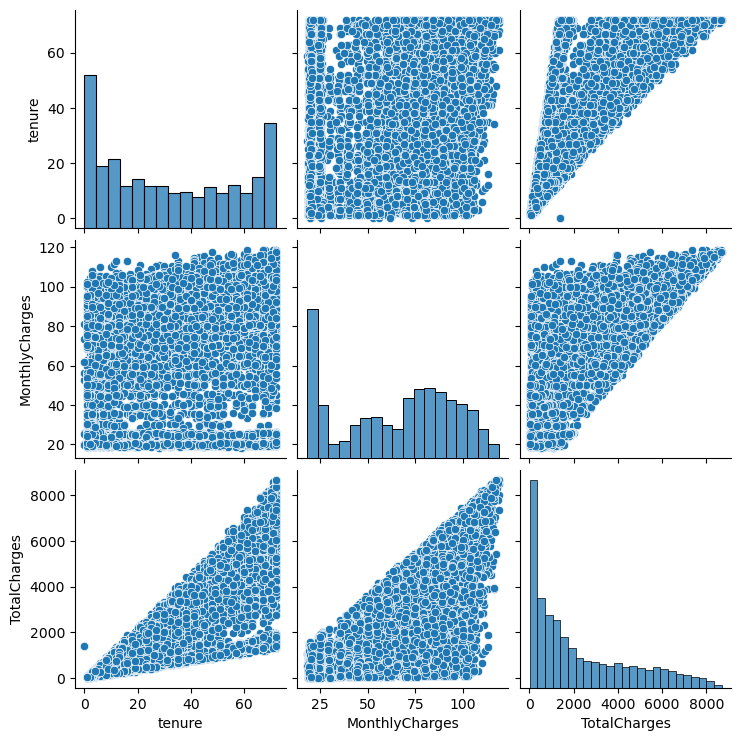

In [56]:
sns.pairplot(df[["tenure", "MonthlyCharges", "TotalCharges"]])
plt.show()

### Narration
The histogram of tenure and total charges are right skewed which translates to low tenure and total charge while monthly charge are evenly spread.
There appears to be  a positive relationship between tenure and total charge from the scatterplot,the higher the tenure the higher the total charge which makes sense since longer tenure leads to more accumulated charges.The relationship between monthly charge and total charge is moderately positive because higher monthly charge contributes to higher total charge.Tenure and monthly charge shows no clear relationship because customers on short or long tenure will likely pay the same monthly charge except there is a contract in place

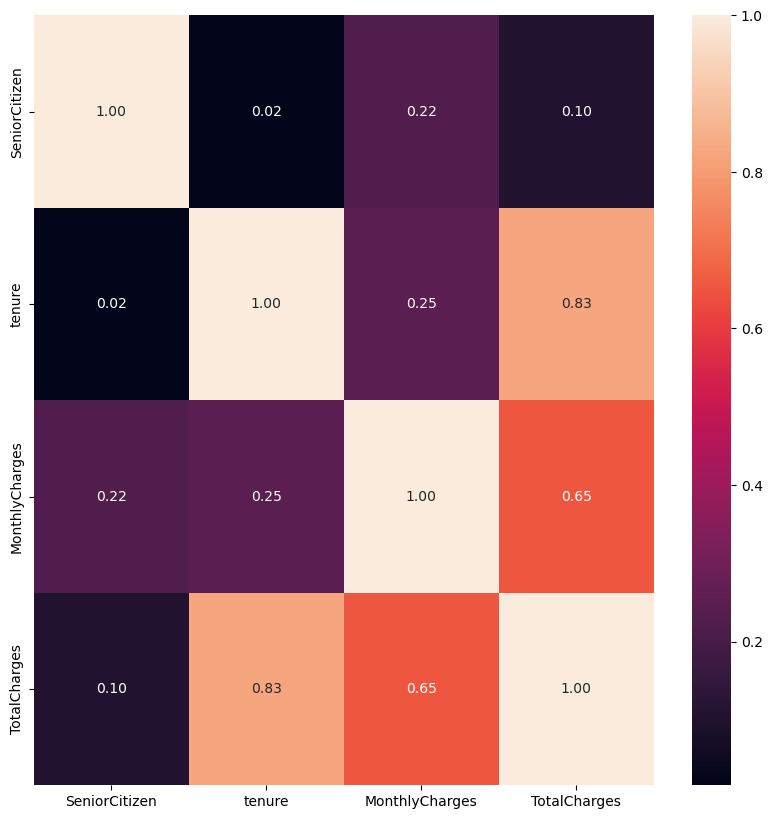

In [58]:
corr_matrix = numerical_features.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10})
plt.show()

### Narration

* Total Charges vs Tenure
There appears to be a very strong positive correlation between Total Charges and Tenure. This is expected, as customers who have been with the company longer tend to accumulate higher total charges over time,and lonh term customere contribute significantly to total revenue,hence serious attention should be paid to customers retention strategies.


* Total Charges vs Monthly Charges

This is a positive relationship albeit a weaker than expected one. This suggests that some customers may have high monthly charges but low total charges, possibly due to early churn or short tenure, Identifying such customers could highlight high-risk groups that may require proactive engagement.


* Monthly Charges vs Tenure

There appears to be a very weak positive correlation between  Monthly Charges and Tenure. This is because customers with shorter tenure always have higher monthly charge,while the ones on longer tenure always have a moderate to low monthly charges which could be due to discount offers,lower bundle plans etc.



* Senior Citizen vs Tenure

The heatmap shows a negative correlation between Senior Citizen and Tenure.
This indicates that senior citizens tend to have shorter tenures compared to non-senior customers.This suggests that senior citizens may be more prone to early churn or less likely to maintain long-term service commitments. Targeted retention strategies, such as personalized customer support or loyalty incentives, could help improve engagement in this group.


* Senior Citizen vs Monthly Charges

There is a positive correlation between Senior Citizen and Monthly Charges suggests that senior citizens are more likely to pay higher monthly charges compared to younger customers.
Possible Reasons:
a. Senior citizens may be subscribing to premium services or bundled plans that increase their monthly costs.
b. They may also rely more on essential services such as phone support, security add-ons, or Tech Support, which contribute to higher charges.

To reduce churn with this group of customers, we can consider offering senior customers customized service bundles with improved value or discounts on essential services.

* Senior Citizen vs Total Charges

The heatmap indicates a weak or slightly negative correlation between Senior Citizen and Total Charges.
This aligns with the earlier observation that senior citizens often have shorter tenures, limiting their ability to accumulate high total charges despite paying higher monthly fees.Since senior citizens are paying more monthly but staying for shorter periods, improving their onboarding experience, simplifying billing processes, and enhancing customer support may increase their retention.





### Feature Engineering

In [61]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
for i,col in enumerate(categorical_features):
    print(col, categorical_features[col].nunique())

gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


In [63]:
# import Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [64]:
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'],
                             drop_first=True)

In [65]:
LbEnc = LabelEncoder()
df["gender"] = LbEnc.fit_transform(df["gender"])
df["Partner"] = LbEnc.fit_transform(df["Partner"])
df["Dependents"] = LbEnc.fit_transform(df["Dependents"])
df["PhoneService"] = LbEnc.fit_transform(df["PhoneService"])
df["PaperlessBilling"] = LbEnc.fit_transform(df["PaperlessBilling"])
df["Churn"] = LbEnc.fit_transform(df["Churn"])

In [66]:
# Scaling Data(Numerical)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [67]:
scalar = StandardScaler()
cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[cols] = scalar.fit_transform(df[cols])
df[cols]

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470
...,...,...,...
7038,-0.340876,0.665992,-0.128655
7039,1.613701,1.277533,2.243151
7040,-0.870241,-1.168632,-0.854469
7041,-1.155283,0.320338,-0.872062


In [68]:
# Check For Data Balance
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

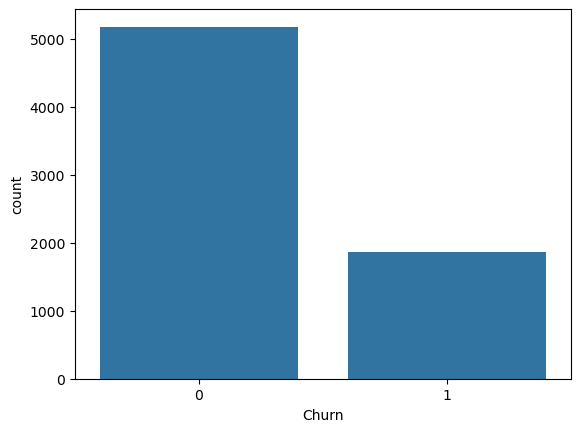

In [69]:
sns.countplot(x=df["Churn"])

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
X= df.drop("Churn", axis=1)
y= df["Churn"]

In [72]:
#Data balancing
smote= SMOTE(random_state=42)
X_resample, y_resample= smote.fit_resample(X,y)

In [73]:
y_resample.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

### Splitting data into training and testing

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test= train_test_split(X_resample, y_resample, random_state=42, test_size=0.2, stratify=y_resample)

In [77]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 8278
Testing set size: 2070


# Model

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)


In [80]:
model_LR= LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [81]:
model_RF= RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [172]:
xgb_model = XGBClassifier( n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Evaluation


In [148]:
# Classification
y_pred= model_LR.predict(X_train)
classification_report(y_pred, y_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3943
           1       0.83      0.79      0.81      4335

    accuracy                           0.80      8278
   macro avg       0.80      0.80      0.80      8278
weighted avg       0.80      0.80      0.80      8278



In [160]:
y_pred= model_RF.predict(X_train)
classification_report(y_pred, y_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4137
           1       1.00      1.00      1.00      4141

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



In [213]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # For ROC curve and AUC score


print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.81
Precision: 0.78
Recall: 0.86
F1 Score: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1035
           1       0.78      0.86      0.82      1035

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



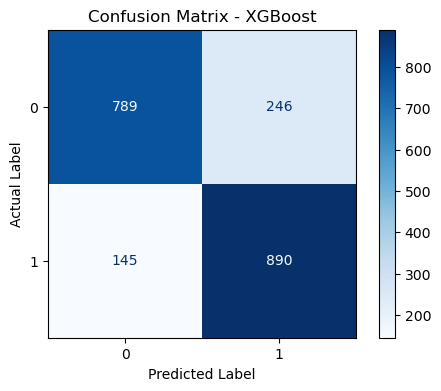

In [225]:
cm= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


### Narration
* True Negatives (TN)
 Represent customers who did not churn and were correctly predicted as non-churners.
A higher TN value indicates the model effectively identifies loyal customers.

* True Positives (TP)
Represent customers who churned and were correctly predicted as churners.
This is a key success factor since identifying churners helps the business take proactive retention measures.

* False Negatives (FN)
Represent actual churners who were incorrectly classified as non-churners.
False negatives are critical in churn prediction because these are customers at risk of leaving without intervention.

* False Positives (FP)
Represent loyal customers who were wrongly classified as churners.
While this misclassification leads to wasted retention efforts, it’s less harmful than failing to detect actual churners.


### Analysis of models
Three(3) supervised machine learning process was deployed,and of all the three the Xgboost appears to be the best performing while the Random Forest model appears to be overfitting- Overfitting occurs when the model memorizes the training data rather than learning generalizable patterns, leading to poor performance on unseen data.

The Xgboost trained model demonstrated the following performance characteristics based on key evaluation metrics:

* Accuracy: The model achieved a satisfactory accuracy score of 81%, indicating strong overall performance.

* Precision: The model displayed reasonable precision, meaning it effectively minimized false positives (customers incorrectly classified as churners).

* Recall: Recall was a critical focus, and the model produced an 86% as it measures the model's ability to capture true churn cases(True Positives).
Improving recall ensured fewer false negatives — a priority since missed churners represent lost business opportunities.

* F1-Score: The F1-score of balanced precision and recall, providing a strong indicator of overall model performance at 82% .

* Confusion Matrix Analysis:

The matrix revealed a moderate presence of false negatives, meaning some churners were missed.
Reducing these false negatives should be a key focus for improving the model's effectiveness in identifying high-risk customers.


### Summary

 In regards to the customer churn prediction, the business should focus more on key metrics that reduce potential revenue loss while improving retention strategies.In light of this the business should be more concerned about reducing False Negatives.
 False negatives represent actual churners who were incorrectly classified as loyal customers.Missing these customers results in direct revenue loss and missed intervention opportunities.
 The business should prioritize improving recall to reduce false negatives, ensuring valuable churners are identified early. Balancing recall with a reasonable precision will help optimize resource allocation for retention strategies.

 
 The following Retention Strategies should be explored:
* Use the model's high recall of 86% to target at-risk customers with personalized retention campaigns.

* Monitor Model Performance:Regularly evaluate the model on new data to ensure it continues to perform well as customer behaviour evolves.

* Consider Cost-Benefit Analysis:If the cost of false positives (retention efforts for customers who won't churn) is low compared to the cost of losing customers, the current trade-off is acceptable.

In summary, the model performs well overall, with a strong ability to identify customers who are likely to churn. However, there is room for improvement in reducing false positives for "Churn" predictions. The balanced dataset ensures that the model's performance is consistent across both classes.



